In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 99% 1.05G/1.06G [00:04<00:00, 225MB/s]
100% 1.06G/1.06G [00:04<00:00, 236MB/s]


In [ ]:
from zipfile import ZipFile
zip_ref = ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
# generators
train = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256)
)

test = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size=32,
    image_size = (256,256)
)

#normalize
def process(image, label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

train = train.map(process)
test = test.map(process)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization

In [ ]:
#Create CNN
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3),padding='valid',activation = 'relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3),padding='valid',activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
#Obtain the summary of CNN
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                        

In [ ]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(train, epochs=10,validation_data=test)

Epoch 1/10
625/625 [==============================] - 77s 107ms/step - loss: 1.6192 - accuracy: 0.5723 - val_loss: 0.6627 - val_accuracy: 0.6020
Epoch 2/10
625/625 [==============================] - 64s 103ms/step - loss: 0.5884 - accuracy: 0.6930 - val_loss: 0.5229 - val_accuracy: 0.7426
Epoch 3/10
625/625 [==============================] - 67s 107ms/step - loss: 0.5168 - accuracy: 0.7462 - val_loss: 0.5209 - val_accuracy: 0.7374
Epoch 4/10
625/625 [==============================] - 66s 104ms/step - loss: 0.4516 - accuracy: 0.7883 - val_loss: 0.4411 - val_accuracy: 0.7954
Epoch 5/10
625/625 [==============================] - 64s 101ms/step - loss: 0.3970 - accuracy: 0.8235 - val_loss: 0.5242 - val_accuracy: 0.7400
Epoch 6/10
625/625 [==============================] - 67s 106ms/step - loss: 0.3454 - accuracy: 0.8491 - val_loss: 0.5105 - val_accuracy: 0.7734
Epoch 7/10
625/625 [==============================] - 64s 102ms/step - loss: 0.2770 - accuracy: 0.8849 - val_loss: 0.7990 - val_ac

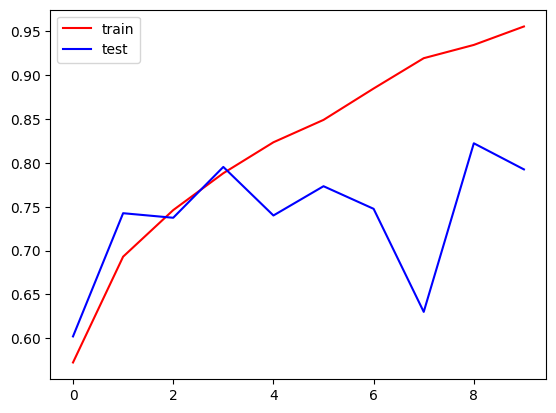

In [12]:
#Accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color='blue', label = 'test')
plt.legend()
plt.show()

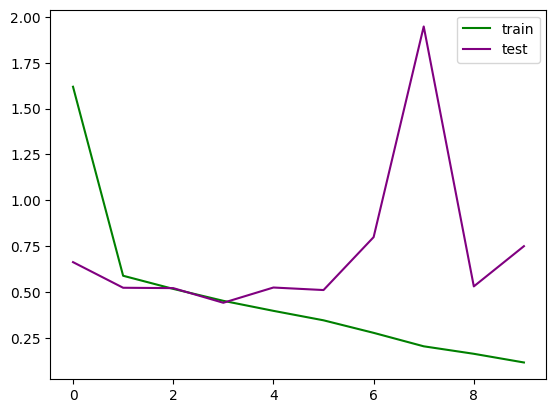

In [13]:
#loss
plt.plot(history.history['loss'],color='green',label='train')
plt.plot(history.history['val_loss'], color = 'purple', label='test')
plt.legend()
plt.show()